## PARTIE: deneigeuse ##

Graphe non orienté

In [80]:
import numpy as np
import scipy as sp
import pandas as pd

In [81]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
pairs = [('A', 'B', 3),
        ('B', 'A', 3),
        ('B', 'D', 1),
        ('D', 'B', 4),
        ('B', 'F', 5),
        ('F', 'B', 5),
        ('C', 'A', 8),
        ('A', 'E', 6),
        ('E', 'C', 8)]

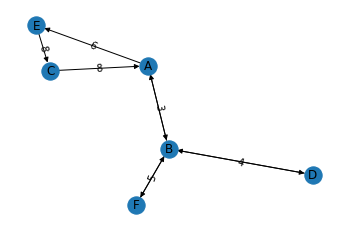

In [82]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(strict=True, directed=False)

G.add_nodes_from(nodes)

for edge in pairs:
    x, y, w = edge
    G.add_edges_from([(x, y)], weight=w)

edge_labels = dict([((u,v,),d['weight'])
                  for u,v,d in G.edges(data=True)])

pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, with_labels=True)

plt.savefig("deneigeuse_graph.png")
plt.draw()
plt.show()


In [85]:
# Find the index correspond to the character
def find(l, f):
    for i in range(len(l)):
        if (l[i]["name"] == f):
            return l[i]["index"]
    return None


class Graph:
    def __init__(self, nodes=[], pairs=[], directed=True):
        self.n = len(nodes)
        self.graph = [[] for i in range(self.n)]
        self.node_name = []
        self.nodes = nodes
        self.edges = []
        self.isDirected = directed
        
        # Create a list of dictionary, for example: {index: 0, name: 'A'}
        for i in range(len(nodes)):
            self.node_name.append({"index" : i, "name": nodes[i]})
        
        # Create a list of edges, for example: [('A', 'B', 5), ('C', 'B', 4)] -> [(0,1), (2,1)]
        for e in pairs:
            x,y,w = e
            self.edges.append((find(self.node_name, x),find(self.node_name, y)))

        # Create a graph
        for edge in pairs:
            x,y,w = edge
            xi,yi = find(self.node_name, x),find(self.node_name, y)
            self.graph[xi].append(yi) #self.graph[xi].append((yi, w))
            if (not directed):
                self.graph[yi].append(xi) #self.graph[yi].append((xi, w))
            
    
    def GraphPrint(self):
        '''
        for x in range (len(self.graph)):
            for p in self.graph[x]:
                y,w = p
                print(str(self.node_name[x]["name"]) + 
                      "--" + str(w) + "->" + 
                      str(self.node_name[y]["name"]))
        '''
        for l in self.graph:
            print(l)
    
    def odd_vertices(self, n, edges):
        deg = [0] * n
        for (a,b) in edges:
            deg[a] += 1
            deg[b] += 1
        return [a for a in range(n) if deg[a] % 2]

    def is_edge_connected(self, n, edges):
        if n == 0 or len(edges) == 0:
            return True
        # Convert to adjacency list
        succ = [[] for a in range(n)]
        for (a,b) in edges:
            succ[a].append(b)
            succ[b].append(a)
        # BFS over the graph, starting from one extremity of the first edge
        touched = [False] * n
        init = edges[0][0]
        touched[init] = True
        todo = [init]
        while todo:
            s = todo.pop()
            for d in succ[s]:
                if touched[d]:
                    continue
                touched[d] = True
                todo.append(d)
        for a in range(n):
            if succ[a] and not touched[a]:
                return False
        return True

    def is_eulerian(self, n, edges):
        return self.is_edge_connected(n, edges) and not self.odd_vertices(n, edges)

    def find_eulerian_cycle(self):
        n = self.n
        edges = self.edges
        if not self.is_eulerian(n, edges):
            print("not eulerian")
            return []
        if len(edges) == 0:
            return []
        cycle = [edges[0][0]] # start somewhere
        while True:
            rest = []
            for (a, b) in edges:
                if cycle[-1] == a:
                    cycle.append(b)
                elif not self.isDirected and cycle[-1] == b:
                    cycle.append(a)
                else:
                    rest.append((a,b))
            if not rest:
                assert cycle[0] == cycle[-1]
                return cycle[0:-1]
            edges = rest
            if cycle[0] == cycle[-1]:
                # Rotate the cycle so that the last state
                # has some outgoing edge in EDGES.
                for (a, b) in edges:
                    if a in cycle:
                        idx = cycle.index(a)
                        cycle = cycle[idx:-1] + cycle[0:idx+1]
                        break

    def eulerialize(self):
        deg = [0] * self.n
        for (a,b) in self.edges:
            deg[a] += 1
            deg[b] += 1
        for i in range(len(deg)):
            d1 = deg[i]
            if (d1 % 2 == 1):
                for j in range(i + 1, len(deg)):
                    d2  = deg[j]
                    if (d2 % 2 == 1):
                        self.edges.append((i,j))
                        self.graph[i].append(j)
    
    def pairs(self):
        p = []
        for x in range(len(self.graph)):
            e = self.graph[x]
            for y in e:
                p.append((self.node_name[x]["name"], self.node_name[y]["name"]))
        return p
    
    def plot(self):
        if (self.isDirected):
            G = nx.DiGraph(strict=True, directed=False)
        else:
            G = nx.Graph(strict=True, directed=False)

        G.add_nodes_from(nodes)
        pairs = self.pairs()
        for edge in pairs:
            x, y = edge
            G.add_edges_from([(x, y)], weight=0)

        edge_labels = dict([((u,v,),d['weight'])
                          for u,v,d in G.edges(data=True)])

        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw(G, pos, with_labels=True)
        
        plt.draw()
        plt.show()

[1, 0, 4, 2, 0, 1, 3, 1, 5]


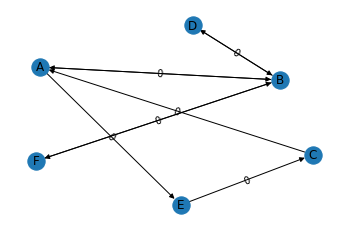

In [86]:
g = Graph(nodes, pairs, directed=True)
print(g.find_eulerian_cycle())
g.plot()

In [87]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
pairs = [('A', 'B', 3),
        ('B', 'A', 3),
        #('B', 'D', 1),
        ('D', 'B', 4),
        ('B', 'F', 5),
        ('F', 'B', 5),
        ('C', 'A', 8),
        ('A', 'E', 6),
        ('E', 'C', 8),
        ('G', 'D', 8)]

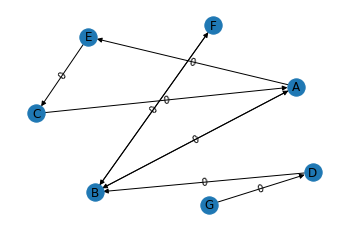

not eulerian
[]
eulerialize graph ...
[1, 0, 4, 2, 0, 1, 5, 1, 6, 3]


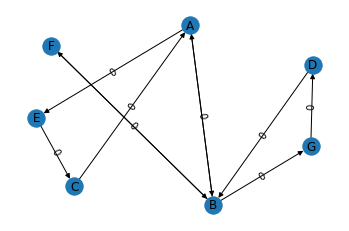

In [90]:
g = Graph(nodes, pairs, directed=True)
g.plot()
print(g.find_eulerian_cycle())
print("eulerialize graph ...")
g.eulerialize()
print(g.find_eulerian_cycle())
g.plot()